In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
dataset=pd.read_csv(r"D:\data\interview\spam.csv",encoding='latin-1')

In [3]:
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [6]:
dataset

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
dataset.isna().sum()

v1    0
v2    0
dtype: int64

In [8]:
dataset['v1'] = dataset['v1'].map({'ham':0 , 'spam':1})

In [9]:
dataset

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
dataset['v1'].value_counts()

v1
0    4825
1     747
Name: count, dtype: int64

In [11]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [13]:
dataset['v2'][1]

'Ok lar... Joking wif u oni...'

In [36]:
pip install emoji

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 361.8/361.8 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for emoji: filename=emoji-2.7.0-py2.py3-none-any.whl size=356589 sha256=40e0058f5f114885c0f65cbe862471dc50edb10e8c7f269f3333b202bc723b19
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\46\6f\a1\87ad867ec0c6b1e2ac8e5ff8535e492697927a7b72f12228be
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: D:\jupyter\python.exe -m pip install --upgrade pip


In [14]:
import emoji

In [16]:
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer

In [26]:
ss=SnowballStemmer('english')

In [17]:
from nltk.corpus import stopwords

In [18]:
stp=stopwords.words('english')

In [22]:
from nltk import word_tokenize

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [33]:
lf=[]
for i in dataset['v2']:
    l=[]
    message = i.lower()
    message = emoji.demojize(message)
    message = re.sub('<.*>?'," ",message)
    message = re.sub('[^a-zA-Z]'," ",message)
    for word in word_tokenize(message):
        if word in stp:
            pass
        else:
            stems=ss.stem(word)
            l.append(stems)
    lf.append(' '.join(l))

In [34]:
lf

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkts st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gon na home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breat

In [36]:
corpus=[]
for i in range(0,len(dataset)):
    message=re.sub('[^a-zA-Z]',' ',dataset['v2'][i])
    message=message.lower()
    message=message.split()
    message=[ss.stem(word) for word in message if not word in stp]
    message=' '.join(message)
    corpus.append(message)

In [37]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkts st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breath

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
cv=CountVectorizer()

In [40]:
x=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,0].values

In [41]:
x.shape

(5572, 6216)

In [42]:
y.shape

(5572,)

In [43]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [44]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [52]:
x_train.shape

(4457, 6216)

In [53]:
x_test.shape

(1115, 6216)

In [54]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train,y_train)

MultinomialNB()

In [55]:
y_pred=classifier.predict(x_test)

In [57]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

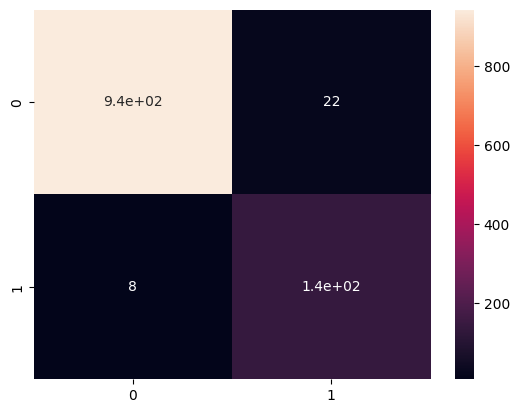

In [60]:
sns.heatmap(cm, annot=True)

In [61]:
from sklearn.metrics import precision_score,recall_score

In [62]:
print(precision_score(y_test,y_pred))

0.8658536585365854


In [63]:
print(recall_score(y_test,y_pred))

0.9466666666666667


In [64]:
txt='welcome to my channel arif. learn machine learning for free'

In [67]:
txt=np.array([txt])

In [68]:
txt=cv.transform(txt)

In [69]:
classifier.predict(txt)

array([1], dtype=int64)

In [70]:
import pickle

In [71]:
pickle.dump(classifier,open('model.pkl','wb'))

In [72]:
pickle.dump(classifier,open('vector.pkl','wb'))